# Entanglement

1. **EPR Paradox :**

2. **Bell's Inequality :**
Assumptions : (1) Locality : You can't travel faster than the speed of light. an event at one point cannot instantaneously have an effect at another point. It is known as hidden variables interpretation of quantum mechanics (2) Realism : Things should have definite values wheather or not we measure them. objects exist even when they are not observed/measured. eg : the moon does exist regardless of whether you are looking at it.

3. **CHSH Inequality :** It is a generalization of Bell's inequality.
Consider the two quantum particles, Alice and Bob and detector measures  


### Entanglement
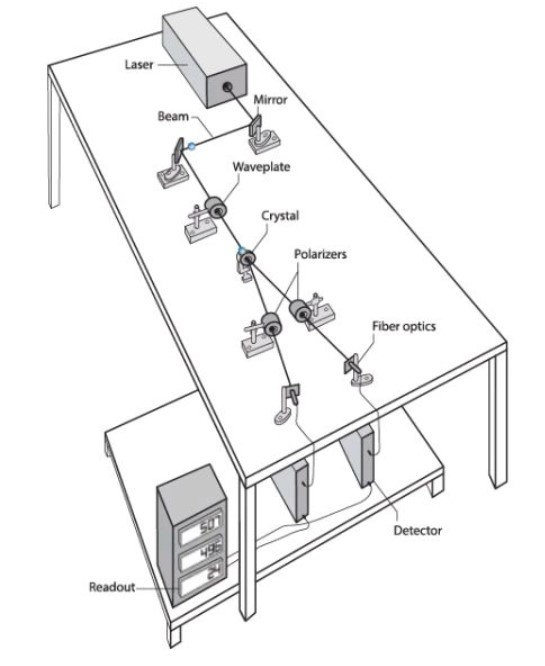

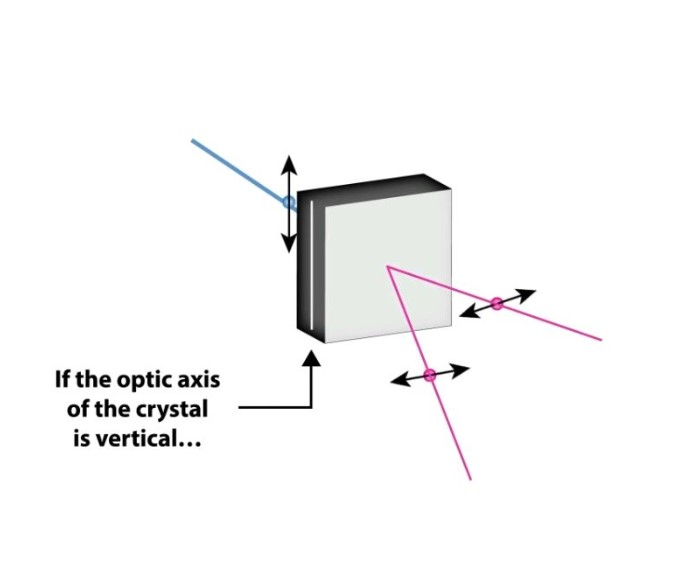

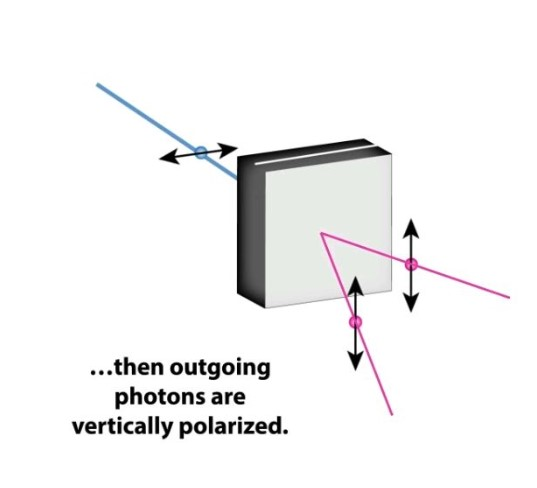

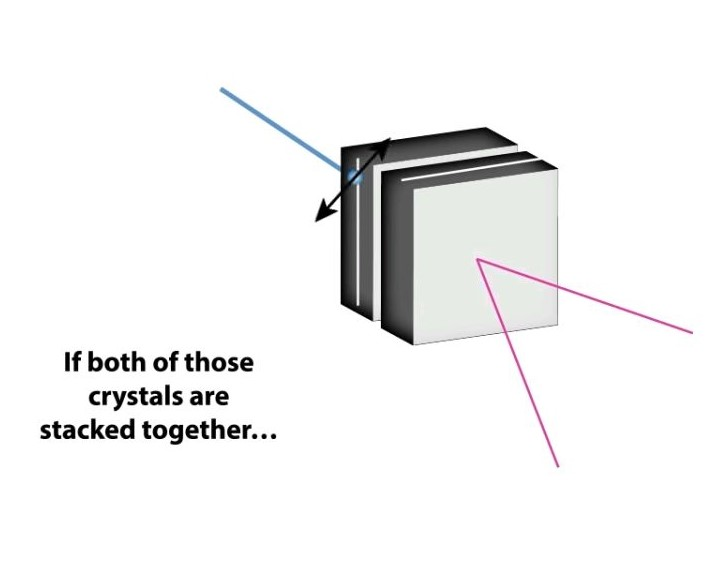

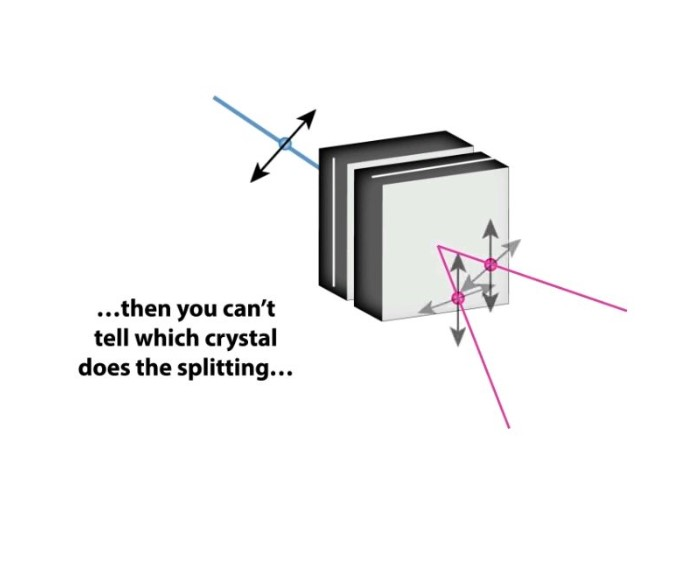

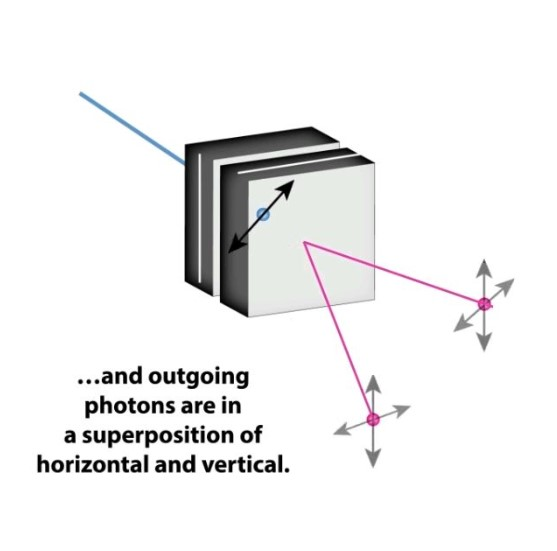

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram
from qiskit import execute,Aer
from qiskit.tools.visualization import plot_bloch_multivector, plot_state_qsphere

In [2]:
from qiskit.quantum_info import Statevector

#### 1. Bell State(entangled)
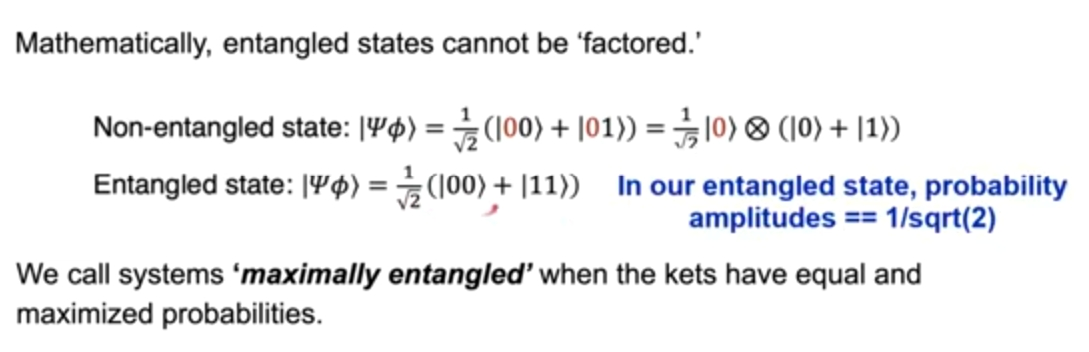
We will see, how bell states can be generated using quantum gates(hadamard and controlled not gate) and demonstrate how to create the Bell state $$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ from the state $\vert00\rangle$.
![bell state qc1.jpg](<attachment:bell state qc1.jpg>)
similarly we can also create via chaning input qubits values
We can create the state : 
![bell state qc2.jpg](<attachment:bell state qc2.jpg>)

The Possible bell state from two qubits
![bell state truth table qc3.jpg](<attachment:bell state truth table qc3.jpg>)

we use the Hadamard gate, along with a controlled-X gate, to create the Bell state.
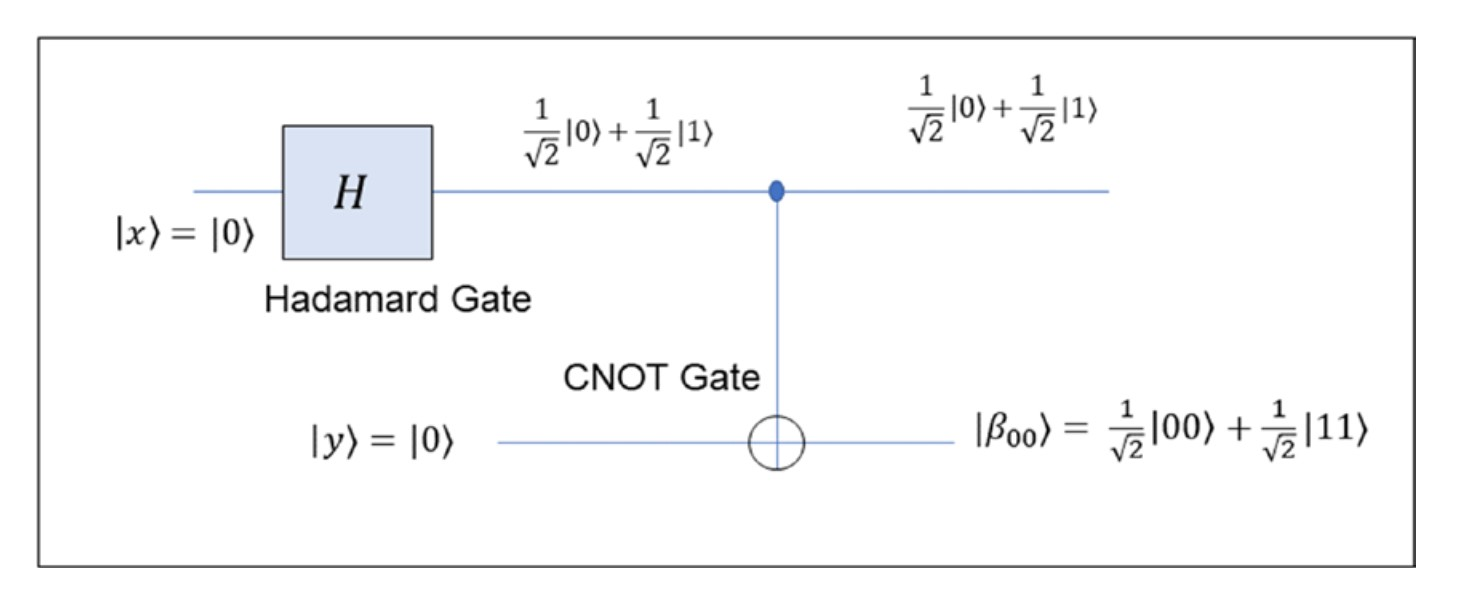
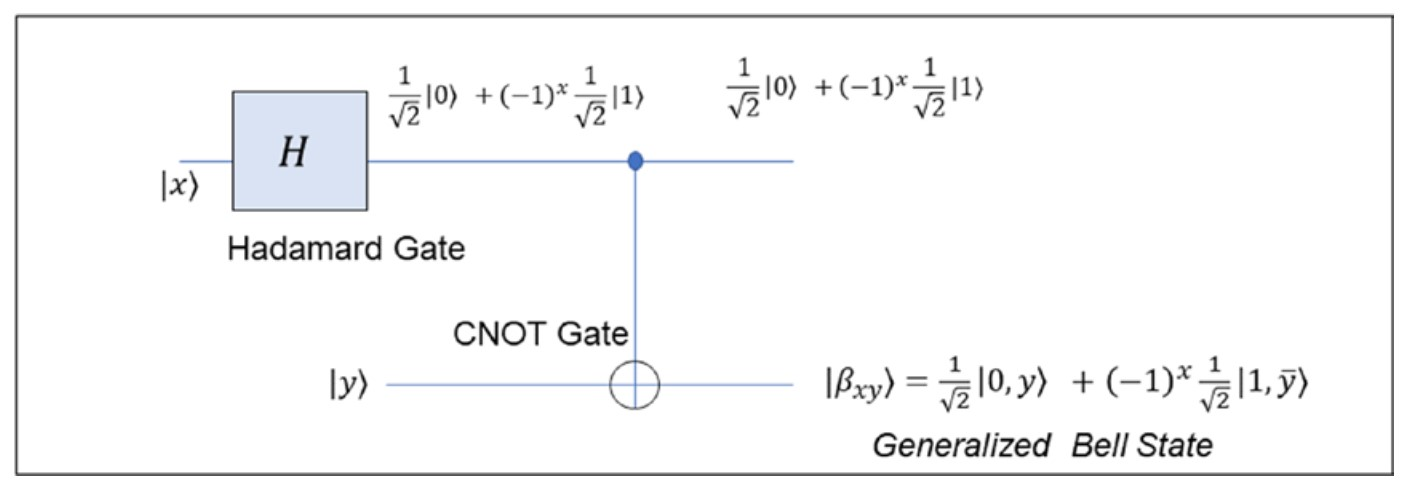
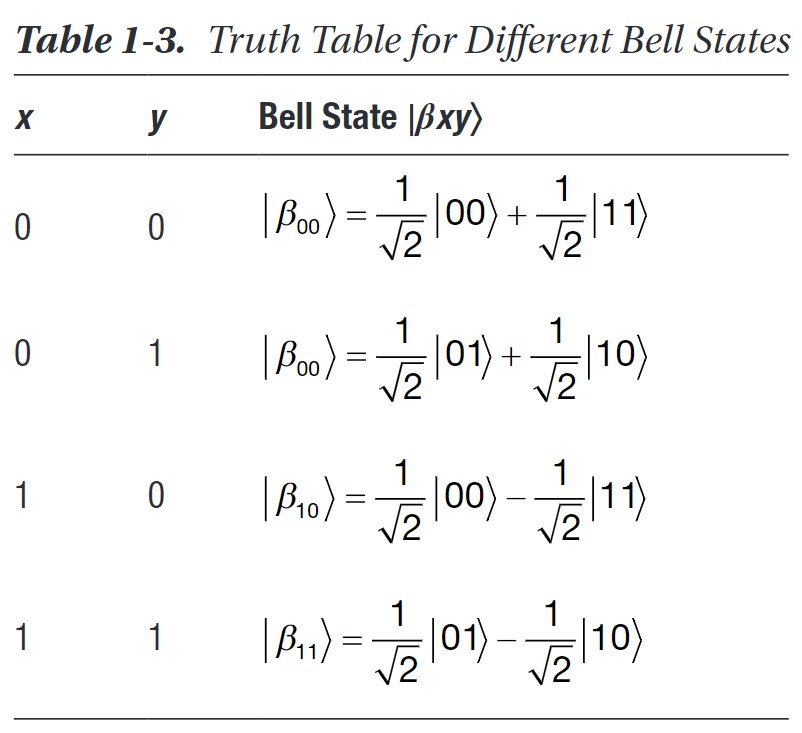

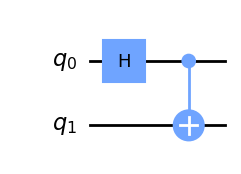

In [3]:
# declare and initialize a quantum circuit
qbell = QuantumCircuit(2)

# adding hadamard gate to obtain the superposition 
qbell.h(0)

# adding controlled not gate via controlling 0th and targeting 1st qubit
qbell.cx(0,1)
# let's visualize the quantum circuit
qbell.draw(output='mpl')

Following entanglement, it is no longer possible to treat the two qubits individually, and they must be considered to be one system means entangled states can't be seperated and they must be treated as one unified system even if they are large distances away. The action on the one part of the system inpacts the others also.

To see this clearly, we can see what would happen if we measured the Bell state above 1000 times.

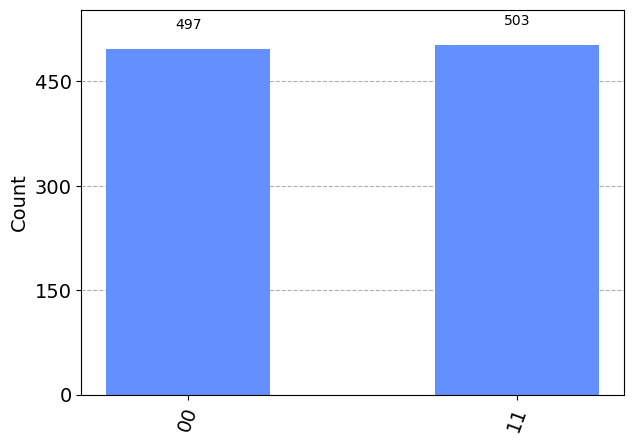

In [4]:
sv = Statevector.from_label('00')
new_sv = sv.evolve(qbell)
counts = new_sv.sample_counts(shots=1000)
plot_histogram(counts)

In [5]:
# lets measure the state of qubits
# Measure all quantum bit (qubit) in the Z basis into classical bit (cbit).

qbell.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(qbell, backend=simulator, shots = 1000).result()
print(result.get_counts())

{'11': 513, '00': 487}


As you can see above, all measurements give either the result `00` or `11`. In other words, if the measurement outcome for one of the qubits is known, then the outcome for the other is fully determined.

#### 2. GHZ(Greenberger-Horne-Zeilinger) State
It is a entangled quantum state which has at least three qubits and creating 3 qubit entangled state is possible with one H(hadamard gate) and 3-1=2 CNOT(Controlled NOT) gates. They are particular form of the multipartite entanglement.

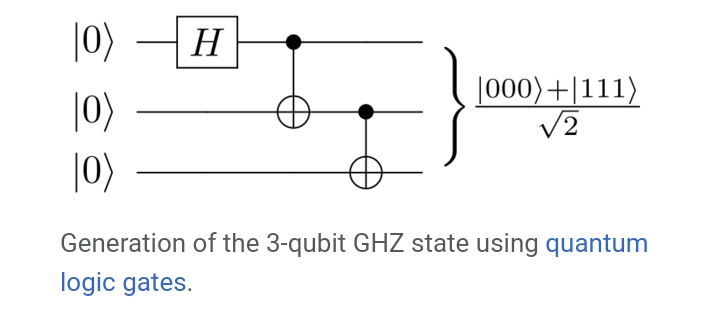

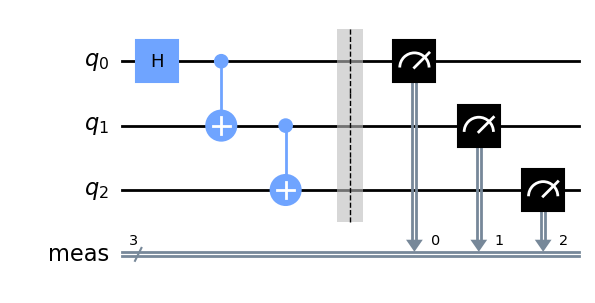

In [10]:
qghz = QuantumCircuit(3)
qghz.h(0)
qghz.cx(0, 1)
qghz.cx(1, 2)
qghz.measure_all()
qghz.draw('mpl')

{'111': 485, '000': 515}


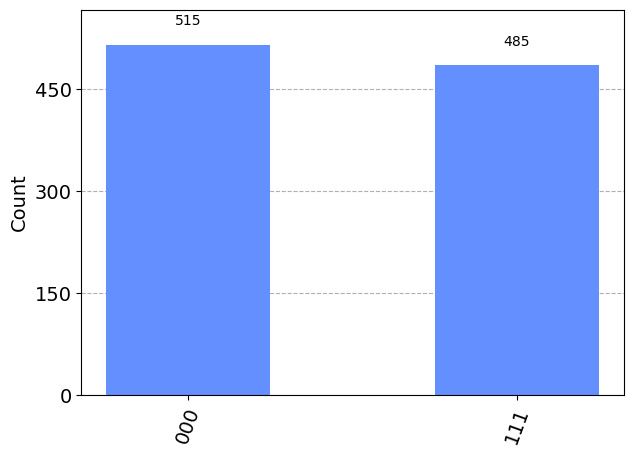

In [12]:

simulator = Aer.get_backend('qasm_simulator')
result = execute(qghz, backend=simulator, shots = 1000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

Generalized GHZ state quantum circuit

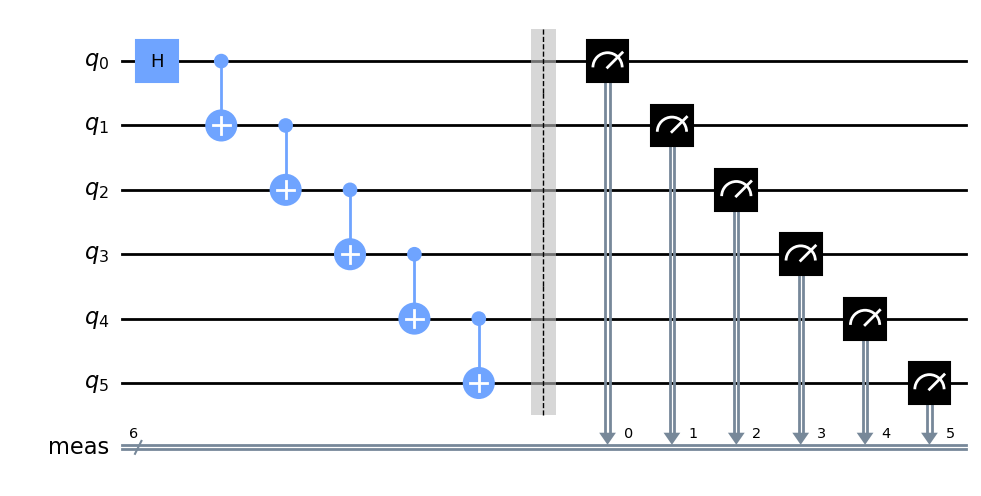

In [13]:
n = int(input('Enter the depth of circuits for ghz state :'))

GHZ = QuantumCircuit(n)

GHZ.h(0)

for i in range(n-1):
    GHZ.cx(i, i+1)
    
GHZ.measure_all()
GHZ.draw(output='mpl')

{'111111': 508, '000000': 492}


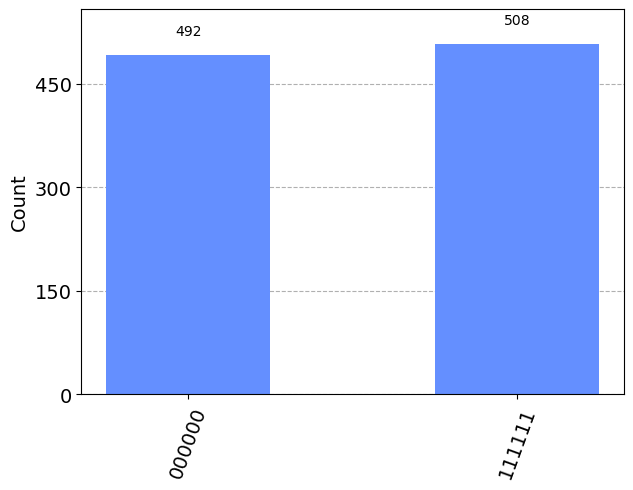

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(GHZ, backend=simulator, shots = 1000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

**GHZ Entangled States Applications**
GHZ entangled states has lots of application where requires large scale computation
1. Communication Protocols like distributed quantum computing or networks
2. Cryptographic Applications like Quantum Key Distribution(for Quantum secret sharing).


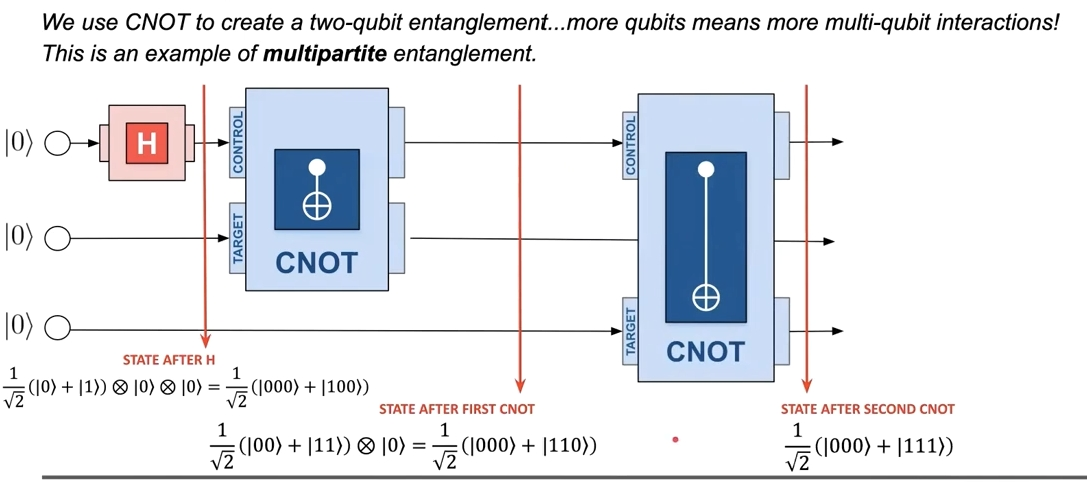

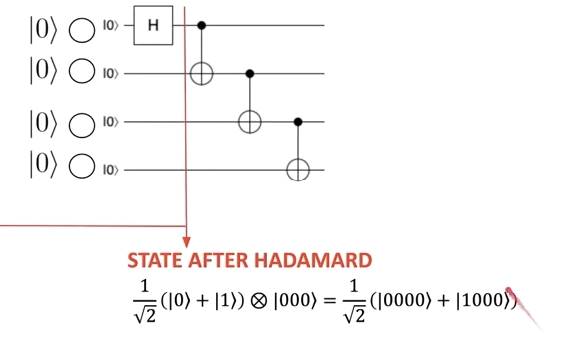

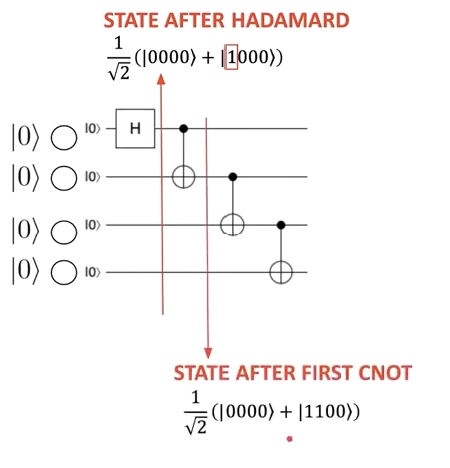

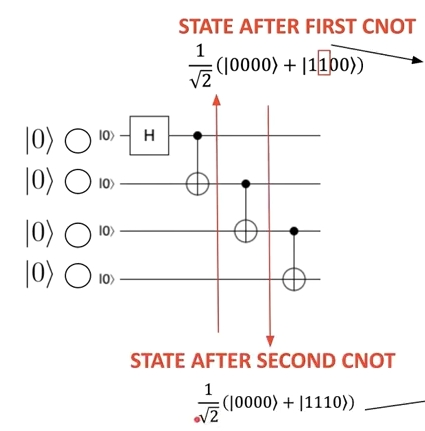

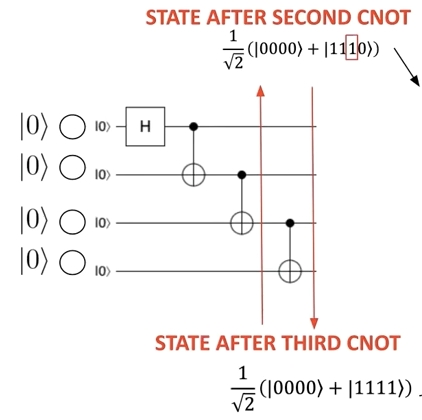

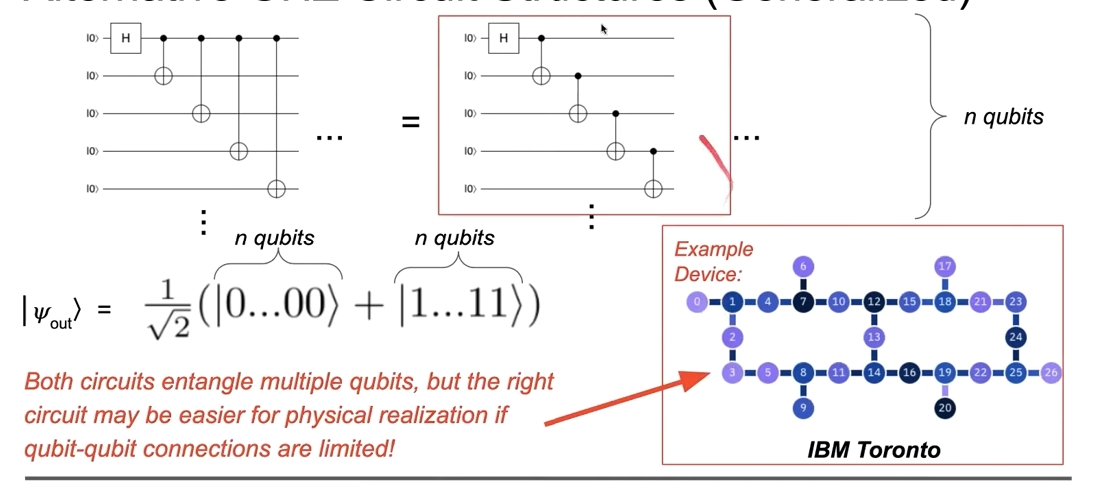

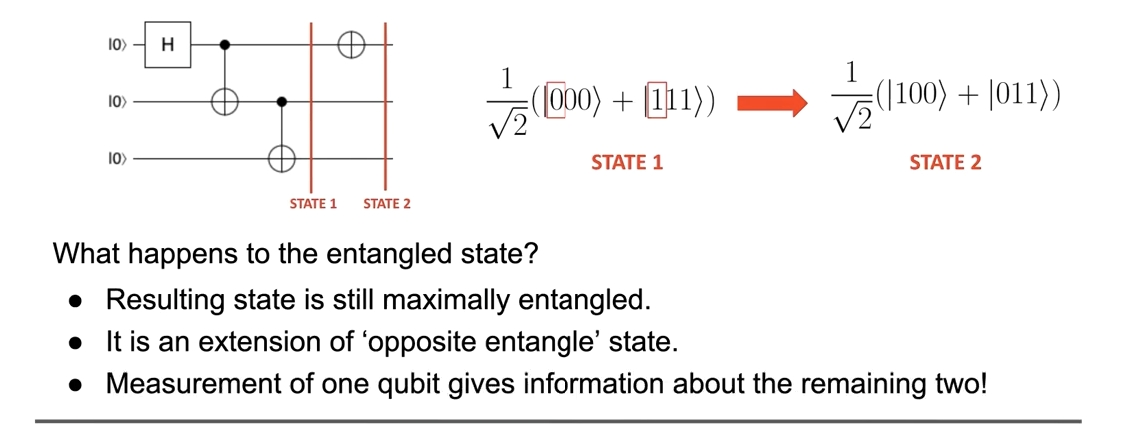

### 4. Quantum Teleportation

In [16]:
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

Before Parameterization Entangled state are : $
|\Phi\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right)
$

 and after parameterizing the circuit entangled state is :
$
|\psi\rangle = \frac{1}{\sqrt{2}} \left(\cos(\theta/2) |00\rangle + \sin(\theta/2)|11\rangle \right)
$

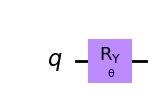

In [17]:
theta = Parameter('θ')

qr = QuantumRegister(1, 'q')
qc = QuantumCircuit(qr)
qc.ry(theta, 0)
qc.draw('mpl')

Alice possesses the quantum information $|\psi\rangle$ in the state of $q$ and wishes to transfer it to Bob. The resource they share is a special entangled state called a Bell state
$$
|\Phi^+\rangle = \frac{1}{2} \left( |00\rangle + |11\rangle \right)
$$
with the first of the pair going to Alice and the second to Bob. Hence Alice has a 2-qubit register ($q$ and $Bell_0$) and Bob has a single-qubit register ($Bell_1$). We will construct the circuit by copying the original `qc` and adding the appropriate registers.

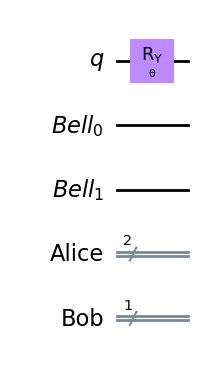

In [18]:
tele_qc = qc.copy()
bell = QuantumRegister(2, 'Bell')
alice = ClassicalRegister(2, 'Alice')
bob = ClassicalRegister(1, 'Bob')
tele_qc.add_register(bell, alice, bob)
tele_qc.draw('mpl')

Now create the Bell pair with $Bell_0$ going to Alice and $Bell_1$ going to Bob. This is done by using a Hadamard gate to put $Bell_0$ in the $|+\rangle$ state and then performing a CNOT with the same qubit as the control. After they receive their respective qubit, they part ways.

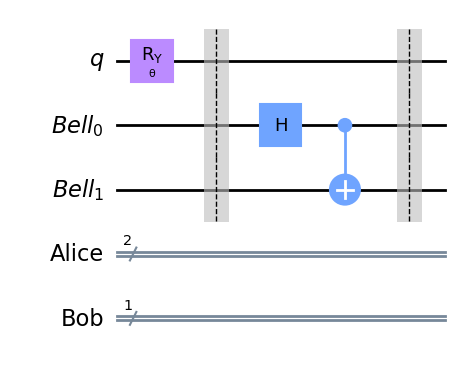

In [19]:
# create Bell state with other two qubits
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
tele_qc.draw('mpl')

Next, Alice performs a CNOT controlled by $q$ on $Bell_0$, which maps information about the state onto it. She then applies a Hadamard gate on $q$.

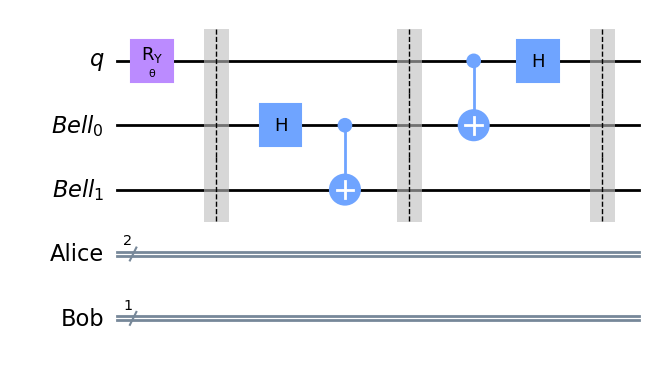

In [20]:
# alice operates on her qubits
tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
tele_qc.draw('mpl')

Now Alice measures her qubits and saves the results to her register.

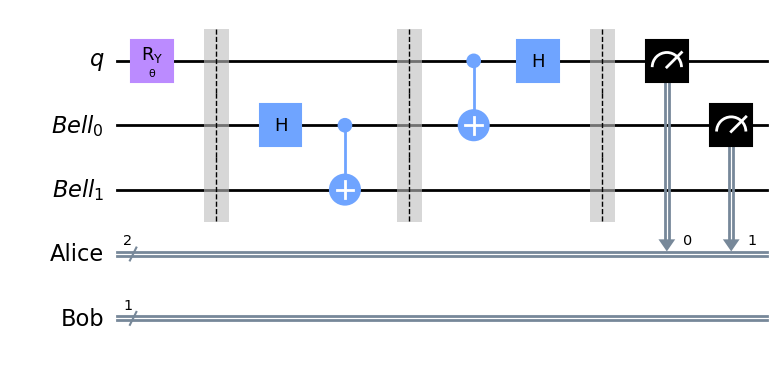

In [21]:
tele_qc.measure([qr[0], bell[0]], alice)
tele_qc.draw('mpl')

Bob's qubit now has the information $|\psi\rangle$ from Alice's qubit $q$ encoded in $Bell_1$, but he does not know what basis to measure in to extract it. Accordingly, Alice must share the information in her register over a *classical* communication channel (this is why teleportation does not violate special relativity, no matter how far Alice and Bob are apart). She instructs Bob to perform an X gate on his qubit if her measurement of $Bell_0$ yields a 1 outcome, followed by a Z gate if her measurement of $q$ yields a 1.

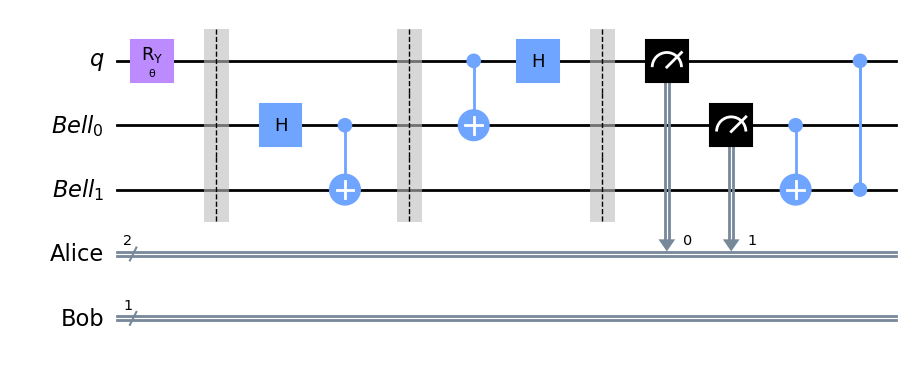

In [30]:
new_q = tele_qc.copy()
# conditional gates to transform Bob's qubit into the $Z$-basis
#new_qc.cx(1, 2)
#new_qc.cz(0,2)
new_q.draw(output='mpl')

In [31]:
new_q.barrier()
new_q.measure(bell[1], bob)


Finally, Bob can measure his qubit, which would yield results with the same probabilities as had Alice measured it originally.

In [32]:
import numpy as np
from qiskit_aer.primitives import Sampler

In [33]:

angle = 5*np.pi/7

sampler = Sampler()
qc.measure_all()
job_static = sampler.run(qc.bind_parameters({theta: angle}))
job_dynamic = sampler.run(new_q.bind_parameters({theta: angle}))

print(f"Original Dists: {job_static.result().quasi_dists[0].binary_probabilities()}")
print(f"Teleported Dists: {job_dynamic.result().quasi_dists[0].binary_probabilities()}")

Original Dists: {'11': 0.8203125, '00': 0.1796875}
Teleported Dists: {'000': 0.0478515625, '101': 0.19921875, '110': 0.20703125, '111': 0.20703125, '100': 0.1962890625, '001': 0.0576171875, '011': 0.0390625, '010': 0.0458984375}


In [34]:
from qiskit.result import marginal_counts

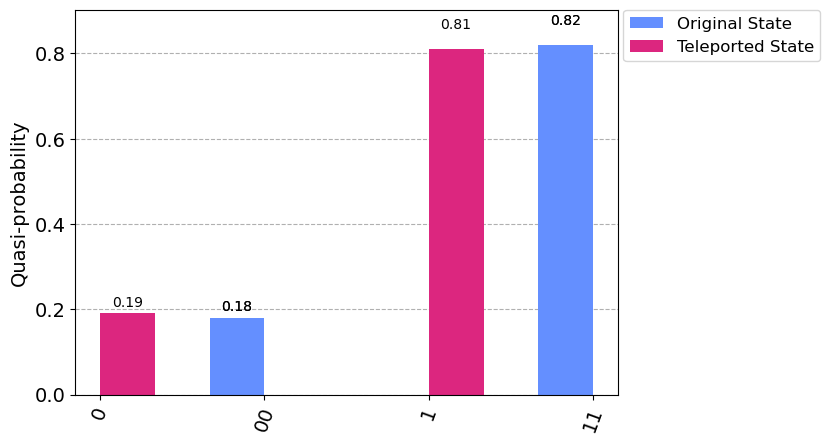

In [36]:
tele_counts = marginal_counts(job_dynamic.result().quasi_dists[0].binary_probabilities(), [2])
legend = ['Original State', 'Teleported State']
plot_histogram([job_static.result().quasi_dists[0].binary_probabilities(), tele_counts], legend=legend)